In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()

In [2]:
# Vector of probabilities
fair_probs = [1.0 / 6] * 6
fair_probs

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [3]:
np.random.multinomial(1, fair_probs)   # Multinimial distribution
#                    ^^^ # tries

array([0, 0, 0, 1, 0, 0], dtype=int64)

In [4]:
np.random.multinomial(6000, fair_probs)  # Distribution of the outcomes

array([ 981,  969,  991,  992, 1011, 1056], dtype=int64)

In [5]:
np.random.multinomial(6000, fair_probs)/1000

array([0.977, 1.031, 0.986, 1.029, 1.005, 0.972])

In [6]:
# Plotting probabilities...
#
# Perform 500 groups of experiments where each group draws 10 samples
counts = np.random.multinomial(10, fair_probs, size=500)
counts

array([[1, 2, 1, 2, 1, 3],
       [1, 3, 2, 2, 0, 2],
       [2, 2, 1, 1, 3, 1],
       ...,
       [2, 0, 2, 1, 3, 2],
       [1, 4, 0, 3, 0, 2],
       [2, 1, 2, 1, 3, 1]], dtype=int64)

In [7]:
# Compute cumulative sum
cum_counts = counts.astype(np.float32).cumsum(axis=0)
cum_counts

array([[  1.,   2.,   1.,   2.,   1.,   3.],
       [  2.,   5.,   3.,   4.,   1.,   5.],
       [  4.,   7.,   4.,   5.,   4.,   6.],
       ...,
       [831., 862., 857., 794., 843., 793.],
       [832., 866., 857., 797., 843., 795.],
       [834., 867., 859., 798., 846., 796.]])

In [8]:
# Compute the probabilities
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)
estimates

array([[0.1       , 0.2       , 0.1       , 0.2       , 0.1       ,
        0.3       ],
       [0.1       , 0.25      , 0.15      , 0.2       , 0.05      ,
        0.25      ],
       [0.13333334, 0.23333333, 0.13333334, 0.16666667, 0.13333334,
        0.2       ],
       ...,
       [0.16686746, 0.17309237, 0.17208835, 0.15943775, 0.1692771 ,
        0.15923695],
       [0.16673347, 0.17354709, 0.17174348, 0.15971944, 0.16893788,
        0.15931864],
       [0.1668    , 0.1734    , 0.1718    , 0.1596    , 0.1692    ,
        0.1592    ]])

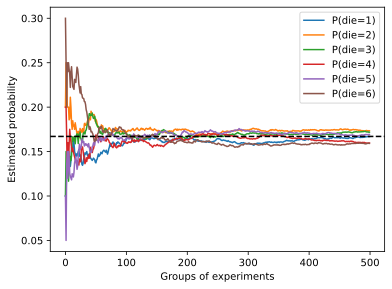

In [9]:
# Plot the progression... law of large number visualized...

d2l.set_figsize((6, 4.5))

for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                 label=("P(die=" + str(i + 1) + ")"))
    
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();